In [1]:
import json
import csv
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import os
import csv

In [112]:
csvs_list = ['10ftnew.csv', '20ftnew.csv', '30ftnew.csv',  '40ftnew.csv', '50ftnew.csv', '60ftnew.csv', '70ftnew.csv']

def square(x):
    return x**2

def positionVector(x, y, z):
    x = square(x)
    y = square(y)
    z = square(z)
    return(abs(sqrt(x + y+ z))) 

def getSums(df):
    print ("sum of Gyro: "+ str(df['sumGyro'].sum()))
    print ("sum of Acc: "+ str(df['sumAcc'].sum()))
    print ("sum of Mag: "+ str(df['sumMag'].sum()))

def getSumGyro(df):
    print ("sum of GyroX: " + str(df['GyroX'].sum()))
    print ("sum of GyroY: " + str(df['GyroY'].sum()))
    print ("sum of GyroX: " + str(df['GyroZ'].sum()))
    gyroSum = abs(df['GyroX'].sum() + df['GyroY'].sum() + df['GyroZ'].sum())
    print gyroSum
    error = (abs(180 - gyroSum) / 100)
    print("error: " + str(error))
    
def create_level_0(df):
    df.reset_index(inplace = True)
    df = df.drop('index', axis=1)
    
def createGraphs(df): 
    #df = df.drop('index', axis=1)
    
    #find midline of acceleration modulated sine curve
    maxAcc = df[df['sumAcc']==df['sumAcc'].max()]
    minAcc = df[df['sumAcc']==df['sumAcc'].min()]
    avgAcc = float(list(minAcc['sumAcc'])[0] + list(maxAcc['sumAcc'])[0])/2

    sumGyro = df['sumGyro']
    sumAcc = df['sumAcc']
    sumMag = df['sumMag']
    index = df['index']

    plt.figure(figsize=(16,5))
    plt.plot(index, sumGyro)
    plt.title('sumGyro 10ft')
    plt.xlabel('Index')
    plt.ylabel('sumGyro')
    plt.show()

    plt.figure(figsize=(16,5))
    plt.plot(index, sumAcc)
    plt.axhline(y=avgAcc, color='r', linestyle='-')
    plt.title('sumAcc 10ft')
    plt.xlabel('Index')
    plt.ylabel('sumAcc')
    plt.show()

    plt.figure(figsize=(16,5))
    plt.plot(index, sumMag)
    plt.title('sumMag 10ft')
    plt.xlabel('Index')
    plt.ylabel('sumMag')
    plt.show()
    
    

10 ft data
sum of Gyro: 327.26555458
sum of Acc: 502.740077104
sum of Mag: 39195.9186466
   index   sumGyro    sumAcc   sumMag
0      0  0.445895   1.07087   85.354
1      1  0.417076    1.0479  85.2641
2      2  0.371987   1.00033  85.0701
3      3  0.343701  0.980807  84.9472
4      4  0.339097  0.963115  84.9472


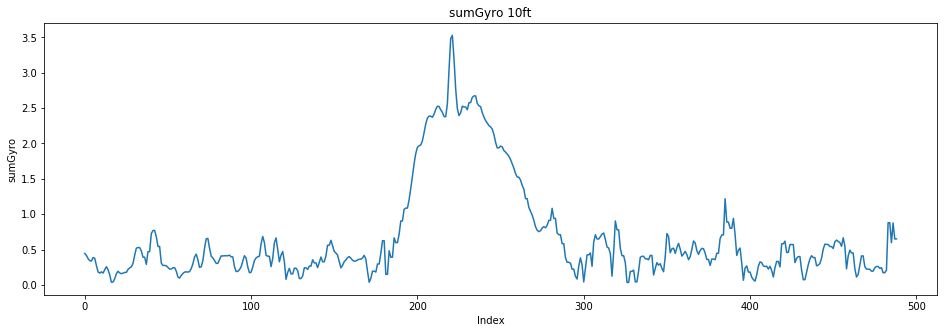

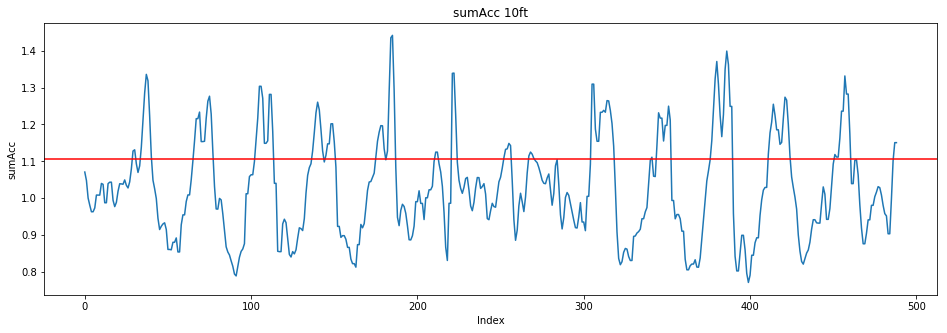

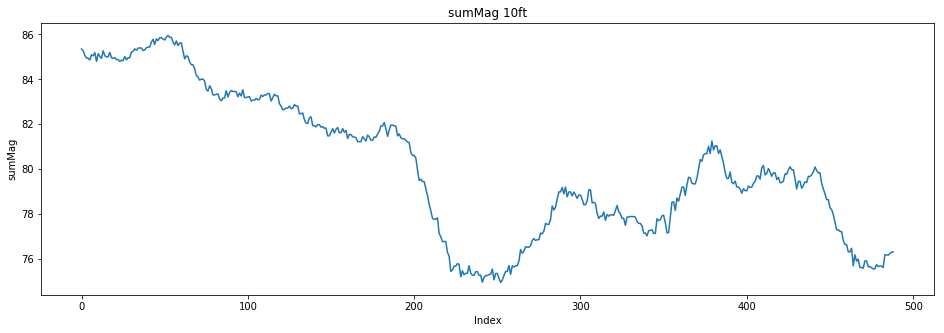

In [42]:
ten_df = pd.read_csv(csvs_list[0])

final_ten_df = pd.DataFrame(columns=['sumGyro', 'sumAcc', 'sumMag'])
for index, row in ten_df.iterrows():
    final_ten_df.at[index,'sumGyro'] = positionVector(row['GyroX'], row['GyroY'], row['GyroZ']) #get OP of Gyro
    final_ten_df.at[index,'sumAcc'] = positionVector(row['AccX'], row['AccY'], row['AccZ']) #get OP of Acc
    final_ten_df.at[index,'sumMag'] = positionVector(row['MagX'], row['MagY'], row['MagZ']) #get OP of Mag

getSums(final_ten_df)
create_level_0(final_ten_df)
print final_ten_df.head()
createGraphs(final_ten_df)

In [113]:
dataframes_final = {}

for c in csvs_list:
    oldname = str(c)
    sep = '.'
    newname = oldname.split(sep, 1)[0]
    print newname
    newname = pd.read_csv(c)
    getSumGyro(newname)

10ftnew
sum of GyroX: 9.534079948
sum of GyroY: -25.849939821
sum of GyroX: -182.284143983
198.600003856
error: 0.18600003856
20ftnew
sum of GyroX: 19.510483791
sum of GyroY: -23.619901451
sum of GyroX: -215.352005904
219.461423564
error: 0.39461423564
30ftnew
sum of GyroX: 19.510483791
sum of GyroY: -23.619901451
sum of GyroX: -215.352005904
219.461423564
error: 0.39461423564
40ftnew
sum of GyroX: 23.455313528
sum of GyroY: -39.319934039
sum of GyroX: -206.334248936
222.198869447
error: 0.42198869447
50ftnew
sum of GyroX: 37.901600496
sum of GyroY: -28.822880685
sum of GyroX: -202.872320131
193.79360032
error: 0.1379360032
60ftnew
sum of GyroX: -13.766796867
sum of GyroY: 35.689563356
sum of GyroX: 165.901336182
187.824102671
error: 0.07824102671
70ftnew
sum of GyroX: 32.293956105
sum of GyroY: 23.435610695
sum of GyroX: 153.335340325
209.064907125
error: 0.29064907125
